In [1]:
#BROWNIAN MOTION STOCHASTIC PROCESS
#Brownian motion is the random motion exhibited by particles which have been suspended in a gas or liquid. This random motion is caused by the collision of the particles with the atoms or molecules in the liquid or gas. Brownian Motion is named after the Botanist Robert Brown who observed the random movements in 1827. The relationship between Brownian Motion and financial markets dates back to a paper written many years later, in 1900, by Louis Bachelier entitled The Theory of Speculation. His paper was the first to propose the use of Brownian Motion to evaluate stock options. The paper did not surface until later works in deriving the famous Black Scholes options pricing formula developed by Fisher Black and Myron Scholes in 1973. In the context of stochastic processes used in finance, Brownian Motion is often described as a Wiener process, denoted by Wt. A Wiener process is described by the following properties,

#W0=0
#The function t→Wt is continuous
#Wt has independent normally distributed increments i.e. Wt−Ws ~ N(0,t−s)
#In practice Brownian Motion is not used to model asset prices. I have included it because it is the foundation of every other stochastic process discussed in this article.



In [2]:
# mistakes in the codes, see mine
import math
import numpy
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

#"""
#Note that this Gist uses the Model Parameters class found here  - https://gist.github.com/StuartGordonReid/f01f479c783dd40cc21e
#"""

def brownian_motion_log_returns(param):
 #   """
  #  This method returns a Wiener process. The Wiener process is also called Brownian motion. For more information
   # about the Wiener process check out the Wikipedia page: http://en.wikipedia.org/wiki/Wiener_process
    #:param param: the model parameters object
    #:return: brownian motion log returns
    #"""
    sqrt_delta_sigma = math.sqrt(param.all_delta) * param.all_sigma
    return nrand.normal(loc=0, scale=sqrt_delta_sigma, size=param.all_time)


def brownian_motion_levels(param):
    #"""
    #Returns a price sequence whose returns evolve according to a brownian motion
    #:param param: model parameters object
    #:return: returns a price sequence which follows a brownian motion
    #"""
    return convert_to_prices(param, brownian_motion_log_returns(param))

In [3]:
#THE ORNSTEIN–UHLENBECK STOCHASTIC PROCESS
#The Ornstein Uhlebneck stochastic process is another mean-reverting process which is sometimes used for modelling interest rates. The Ornstein Uhlenbeck process is named after Leonard Ornstein and George Eugene Uhlenbeck. The difference between the Ornstein Uhlenbeck stochastic process and the CIR process is that the CIR processes multiplies the stochastic component by the square root of the previous value for the interest rate. The stochastic differential equation for the Ornstein Uhlenbeck process is,

#drt=a(b−rt)dt+σdWt # rt can be replaced by xt, b is the mean miu and sigma is the diffusion coefficient(not sure though)

#where Wt is a Wiener process, a is the rate at which the process mean reverts (a larger number results in a faster mean reverting process), b is the long run average interest rate, and σ is the volatility of the process. The code for the Ornstein Uhlenbeck stochastic process is given below.

In [4]:
# OU process
import math
import numpy
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

#"""
#Note that this Gist uses the Model Parameters class found here  - https://gist.github.com/StuartGordonReid/f01f479c783dd40cc21e
#"""

def ornstein_uhlenbeck_levels(param):
    #"""
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    #:param param: the model parameters object
    #:return: the interest rate levels for the Ornstein Uhlenbeck process
    #"""
    ou_levels = [param.all_r0]
    brownian_motion_returns = brownian_motion_log_returns(param)
    for i in range(1, param.all_time):
        drift = param.ou_a * (param.ou_mu - ou_levels[i-1]) * param.all_delta
        randomness = brownian_motion_returns[i - 1]
        ou_levels.append(ou_levels[i - 1] + drift + randomness)
    return ou_levels

In [5]:
# putting everything together
import math
import numpy as np
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

def brownian_motion_log_returns(dt,sigma,time):
    #  This method returns a Wiener process
    sqrt_delta_sigma = math.sqrt(dt)*sigma
    return sqrt_delta_sigma*np.random.normal(0,1)

#define now the hyperparameters for the two functions

def ou_levels(a,b,dt,sigma,time):
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    x = np.zeros(len(time))
    for i in range(0, len(time)-1):
        x[i+1]=x[i]+a*(b-x[i])*dt+math.sqrt(dt)*sigma*np.random.normal(0,1)
    return x

In [6]:
dt=0.02
time=np.arange(0,2,dt)# time
sigma=0.3
a=1# the coefficient in front, the rate
b=1.2# the mean

In [7]:
# Simulation of OU process
ou_levels(a,b,dt,sigma,time)


array([ 0.        ,  0.00475604, -0.01815515, -0.04223282,  0.02625332,
        0.10158033,  0.18338065,  0.11115105,  0.16426938,  0.1883843 ,
        0.22925517,  0.22794722,  0.2219768 ,  0.24214528,  0.2276899 ,
        0.23988251,  0.23143644,  0.28804739,  0.29830263,  0.30903234,
        0.32524756,  0.3372645 ,  0.31364805,  0.34405311,  0.38538422,
        0.3523091 ,  0.37417026,  0.33906342,  0.36915091,  0.47139699,
        0.47214446,  0.47199302,  0.50677266,  0.5420988 ,  0.64297812,
        0.64444825,  0.63231079,  0.65153917,  0.62991455,  0.62499544,
        0.69002406,  0.63436574,  0.6267534 ,  0.60654811,  0.58555631,
        0.55824854,  0.53614278,  0.64195381,  0.61814272,  0.57420082,
        0.56636099,  0.53446032,  0.51598785,  0.45200282,  0.43490001,
        0.45244585,  0.42205238,  0.40717432,  0.36881364,  0.41077853,
        0.52261103,  0.54600815,  0.54065571,  0.5892933 ,  0.56717859,
        0.55737142,  0.55277265,  0.58547265,  0.50014398,  0.51

In [8]:
#1. Simulating the Ornstein–Uhlenbeck process

#You should first be familiar with how to simulate this process using the Euler–Maruyama method. The stochastic differential equation (SDE)

#dxt=θ(μ−xt)dt+σdWt
#can be discretized and approximated via

#Xn+1=Xn+θ(μ−Xn)Δt+σΔWn
#where ΔWn are independent identically distributed Wiener increments, i.e., normal variates with zero mean and variance Δt. Thus, Wtn+1−Wtn=ΔWn∼N(0,Δt)=Δt−−−√ N(0,1). This can be simulated in Matlab very easily using randn to generate standard normal variates:


#another way of simulating an OU process; MATLAB CODE
#th = 1;
#mu = 1.2;
#sig = 0.3;
#dt = 1e-2;
#t = 0:dt:2;             % Time vector
#x = zeros(1,length(t)); % Allocate output vector, set initial condition
#rng(1);                 % Set random seed
#for i = 1:length(t)-1
 #   x(i+1) = x(i)+th*(mu-x(i))*dt+sig*sqrt(dt)*randn;
#end
#figure;
#plot(t,x);

In [9]:
#Simulation of an OU process
training_data=ou_levels(a,b,dt,sigma,time)
t=time# time vector
x=training_data

In [10]:
training_data

array([ 0.        , -0.02794408,  0.01019704,  0.00634356,  0.07801796,
        0.13812648,  0.14468546,  0.22686618,  0.31165046,  0.28826796,
        0.3392234 ,  0.38023006,  0.45016247,  0.43136648,  0.39260909,
        0.51058417,  0.55978228,  0.63976087,  0.59134574,  0.66229072,
        0.64496635,  0.67853576,  0.72139281,  0.70961003,  0.65844395,
        0.73614683,  0.71826118,  0.72616198,  0.83232573,  0.83496409,
        0.79860854,  0.74888933,  0.78560564,  0.71266304,  0.73491732,
        0.72516028,  0.74645966,  0.81003116,  0.82256126,  0.88762038,
        0.85265422,  0.81891237,  0.84195181,  0.7967329 ,  0.8092885 ,
        0.85893994,  0.86987609,  0.87279236,  0.88633385,  0.89740593,
        0.88831842,  0.92026132,  0.90677992,  0.84961706,  0.81317877,
        0.78503185,  0.83078787,  0.83992924,  0.81306476,  0.87229519,
        0.84825981,  0.88105188,  0.88498435,  0.90364635,  0.87678561,
        0.84600419,  0.87325646,  0.87734865,  0.90079662,  0.85

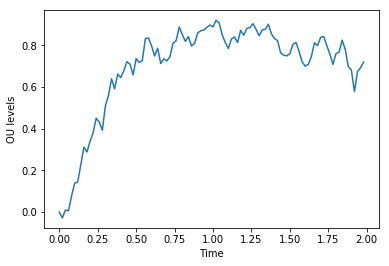

In [11]:
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU levels')
plt.show()
#sigma=0.3 in this plot

In [12]:
#Simulation of an OU process
training_data=ou_levels(5,b,dt,2,time)
t=time# time vector
x=training_data

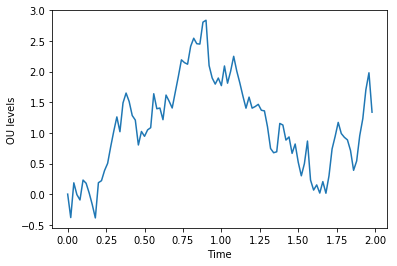

In [13]:
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU levels')
plt.show()
# a=5 in this plot, sigma=2 

In [14]:
#Simulation of an OU process
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

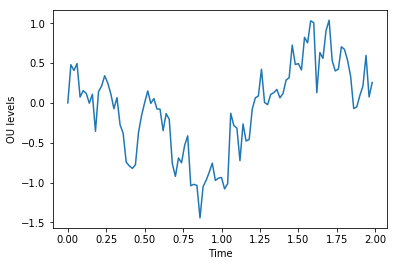

In [15]:
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU levels')
plt.show()
# a=1 in this plot, sigma=2 

In [16]:
training_data=ou_levels(5,b,dt,0.3,time)
t=time# time vector
x=training_data

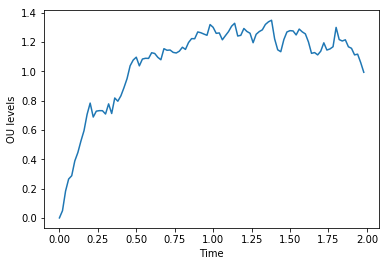

In [17]:
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU levels')
plt.show()
# a=5 in this plot, sigma=0.3

In [18]:
# starts again here
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

In [19]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

C:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Anaconda\lib\site-packages\multipledispatch\dispatcher.py:24: AmbiguityWarning: 
Ambiguities exist in dispatched function _expectation

The following signatures may result in ambiguous behavior:
	[Gaussian, Linear, NoneType, Sum, InducingPoints], [Gaussian, Identity, NoneType, Kernel, InducingPoints]


Consider making the following additions:

@dispatch(Gaussian, Identity, NoneType, Sum, InducingPoints)
def _expectation(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)


In [20]:
t=t[::8]
x=x[::8]


In [21]:
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [22]:
k = gpflow.kernels.Matern12(1,lengthscales=0.1)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise

In [23]:
#They have everything as column vectors
#N = 12
#X = np.random.rand(N,1)
#Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3
#plt.plot(X, Y, 'kx', mew=2)

Text(0,0.5,'OU level')

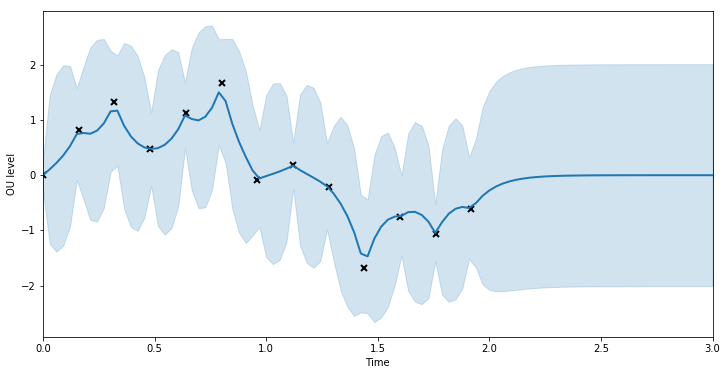

In [24]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

In [25]:
m.as_pandas_table()
# the first variance is the standard error^2 from the mean
# the second variance is observation error
# the lengthscales determine how smooth the line is


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.1
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.819620
  Number of iterations: 16
  Number of functions evaluations: 26


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.819620
  Number of iterations: 16
  Number of functions evaluations: 26


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.6891981021428442
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.47274104057269256
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.15720445593984864


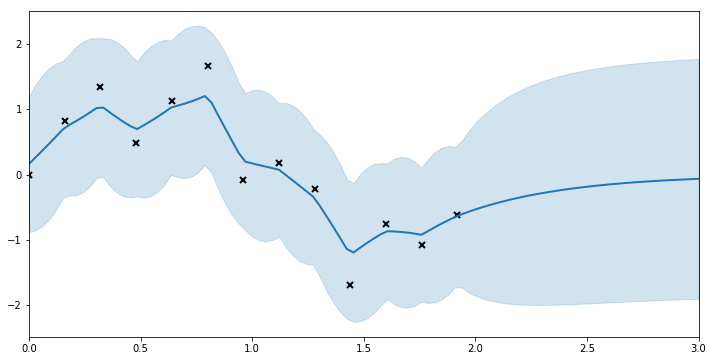

In [26]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [27]:
# another lengthscale value 


In [28]:
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

In [29]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

In [30]:
t=t[::8]
x=x[::8]


In [31]:
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [32]:
k = gpflow.kernels.Matern12(1,lengthscales=0.5)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise

Text(0,0.5,'OU level')

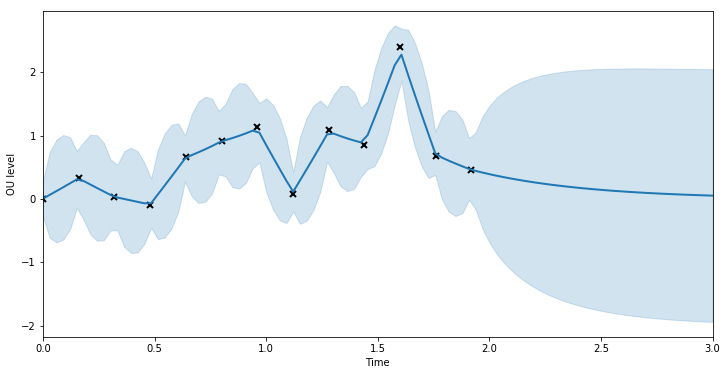

In [33]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

In [34]:
m.as_pandas_table()
# the first variance is the standard error^2 from the mean
# the second variance is observation error
# the lengthscales determine how smooth the line is


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.5
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.690483
  Number of iterations: 20
  Number of functions evaluations: 32


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.690483
  Number of iterations: 20
  Number of functions evaluations: 32


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.47908398001780766
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,2.070285424315325
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.2975513626983875


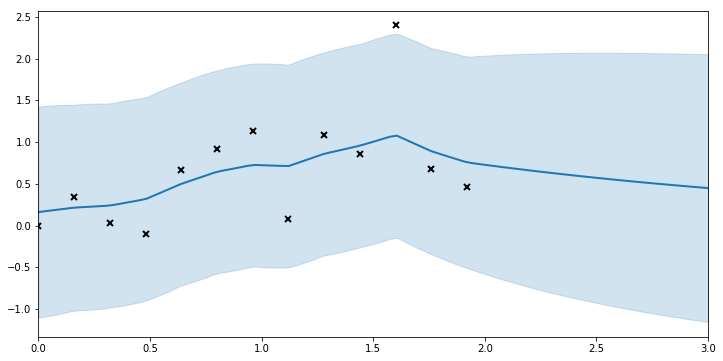

In [35]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [36]:
# another lengthscale value

In [37]:
# starts again here
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

In [38]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

In [39]:
t=t[::8]
x=x[::8]

In [40]:
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [41]:
k = gpflow.kernels.Matern12(1,lengthscales=0.01)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise

Text(0,0.5,'OU level')

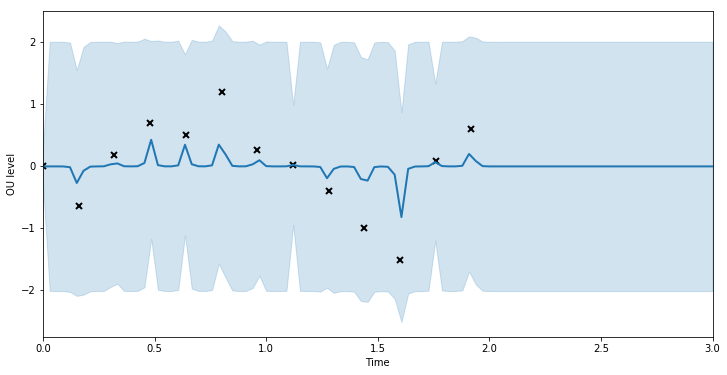

In [42]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

In [43]:
m.as_pandas_table()
# the first variance is the standard error^2 from the mean
# the second variance is observation error
# the lengthscales determine how smooth the line is


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.01
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 13.924527
  Number of iterations: 3
  Number of functions evaluations: 5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 13.924527
  Number of iterations: 3
  Number of functions evaluations: 5


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.48891009533712515
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.010000082082742601
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.009843985980148491


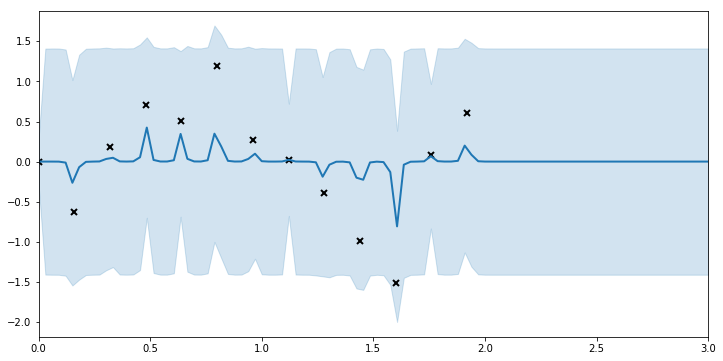

In [44]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [45]:
#another lengthscale value
5

5

In [46]:
# starts again here
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

In [47]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

In [48]:
t=t[::8]
x=x[::8]


In [49]:
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [50]:
k = gpflow.kernels.Matern12(1,lengthscales=5)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise

Text(0,0.5,'OU level')

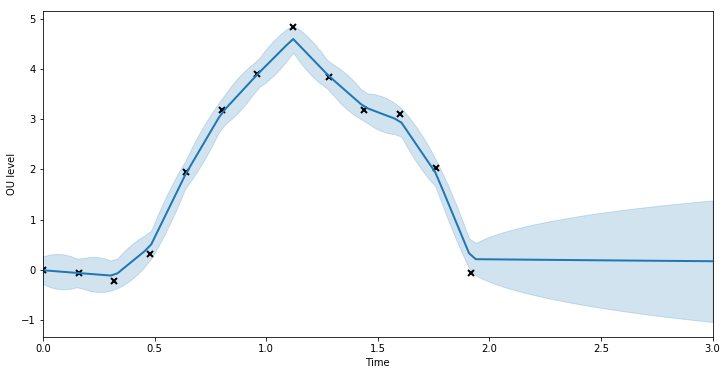

In [51]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

In [52]:
m.as_pandas_table()
# the first variance is the standard error^2 from the mean
# the second variance is observation error
# the lengthscales determine how smooth the line is


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,5.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.966650
  Number of iterations: 29
  Number of functions evaluations: 33


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.966650
  Number of iterations: 29
  Number of functions evaluations: 33


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,4.494530389855586
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,1.3282989174988182
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.010264955943635e-06


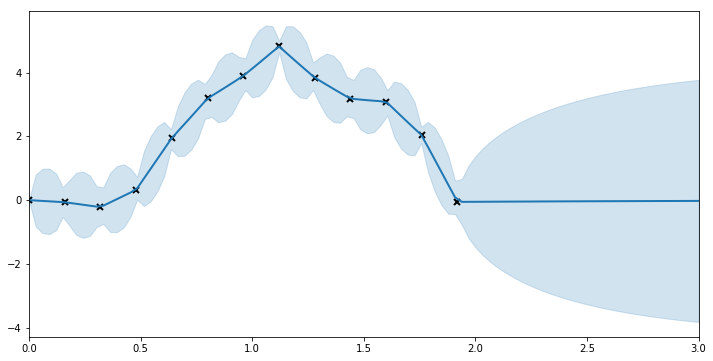

In [53]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [54]:
# SAME DATA to all different lengthscales !!!!!
# Pay attention here
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data
t=t[::8]
x=x[::8]
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

Text(0,0.5,'OU level')

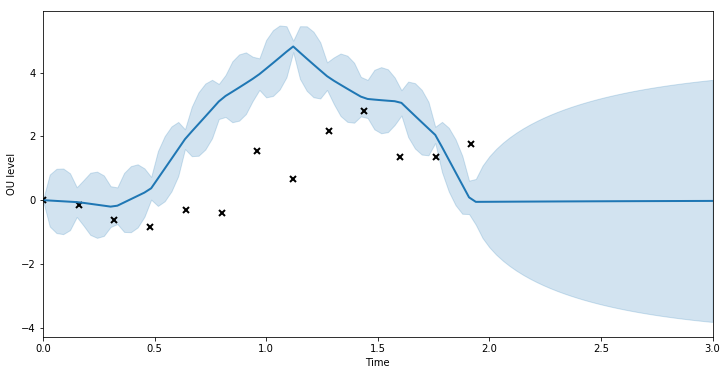

In [55]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

Text(0,0.5,'OU level')

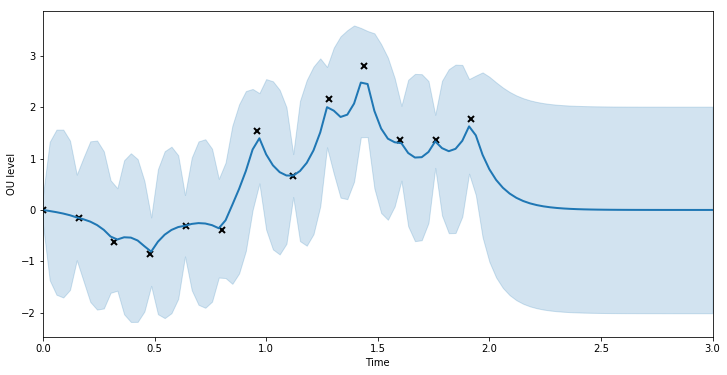

In [56]:
#lengthscale 0.1
k = gpflow.kernels.Matern12(1,lengthscales=0.1)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.604573
  Number of iterations: 17
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.604573
  Number of iterations: 17
  Number of functions evaluations: 24


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.582896747819741
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,1.0074182442162594
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.17425947877098813


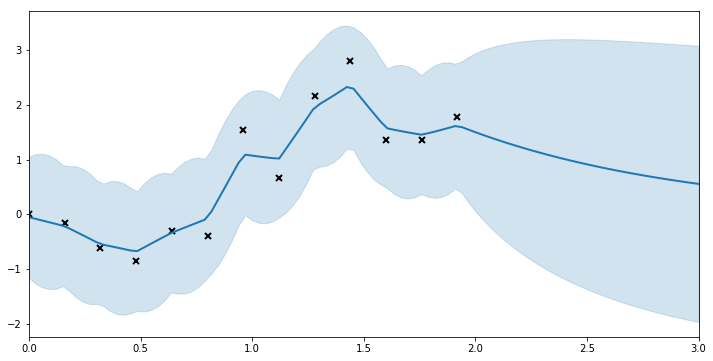

In [57]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

Text(0,0.5,'OU level')

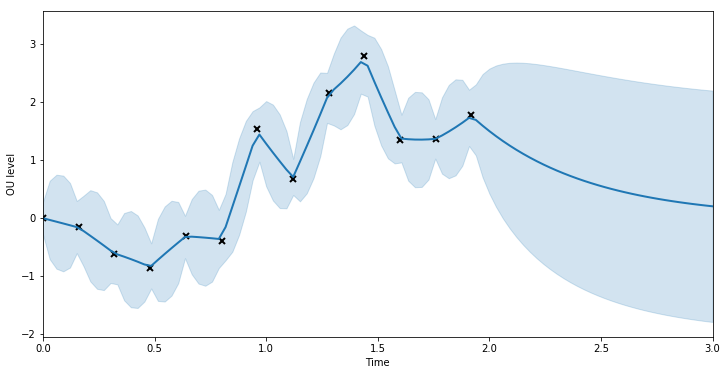

In [58]:
#lengthscale 0.5
k = gpflow.kernels.Matern12(1,lengthscales=0.5)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.604573
  Number of iterations: 19
  Number of functions evaluations: 25


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.604573
  Number of iterations: 19
  Number of functions evaluations: 25


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.5828804870723847
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,1.0074232779764305
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.1742651055488606


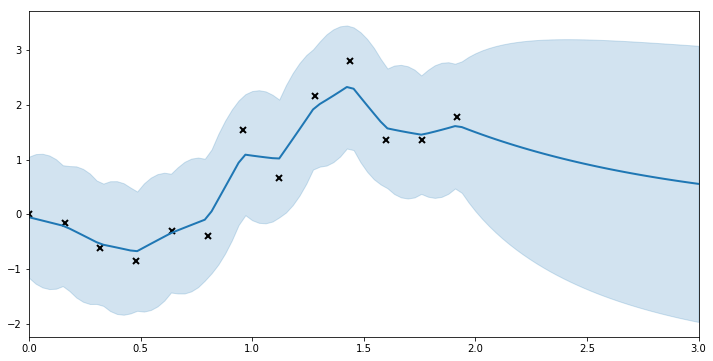

In [59]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

Text(0,0.5,'OU level')

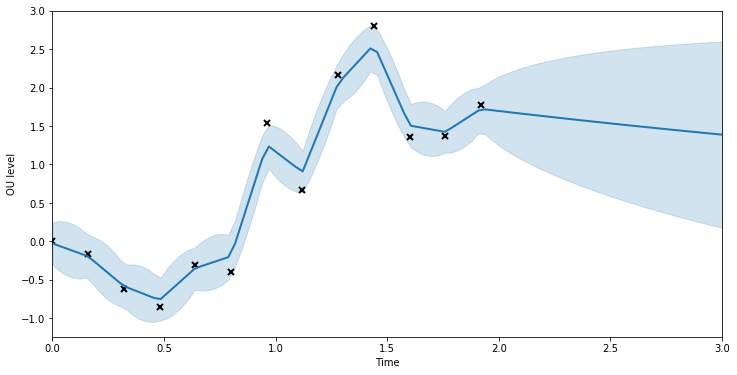

In [60]:
#lengthscale 5
k = gpflow.kernels.Matern12(1,lengthscales=5)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.604573
  Number of iterations: 20
  Number of functions evaluations: 23


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.604573
  Number of iterations: 20
  Number of functions evaluations: 23


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.5828978357967123
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,1.007423601903203
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.17426012909734753


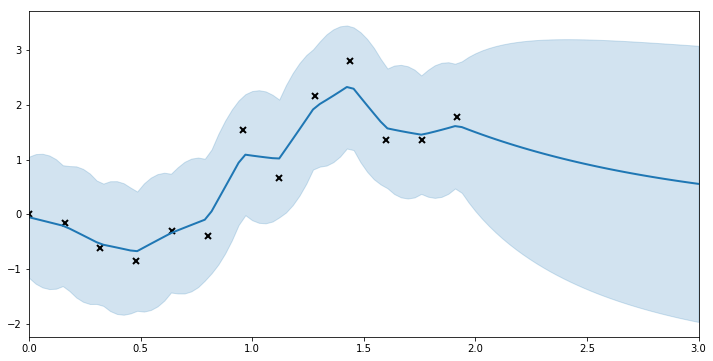

In [61]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

Text(0,0.5,'OU level')

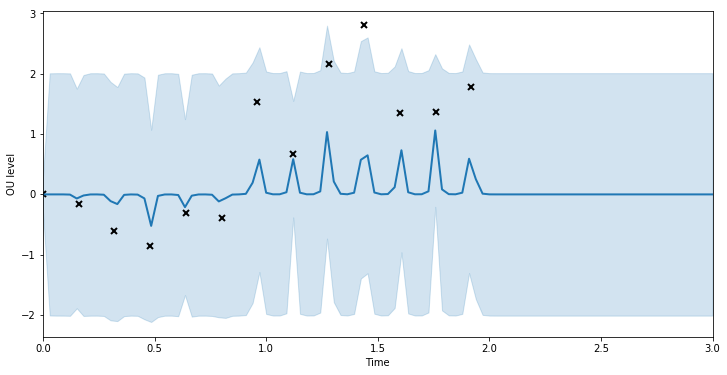

In [62]:
#lengthscale 0.01
k = gpflow.kernels.Matern12(1,lengthscales=0.01)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 22.311038
  Number of iterations: 5
  Number of functions evaluations: 6


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 22.311038
  Number of iterations: 5
  Number of functions evaluations: 6


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.802120750476837
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.010000571729932286
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.010167629534381658


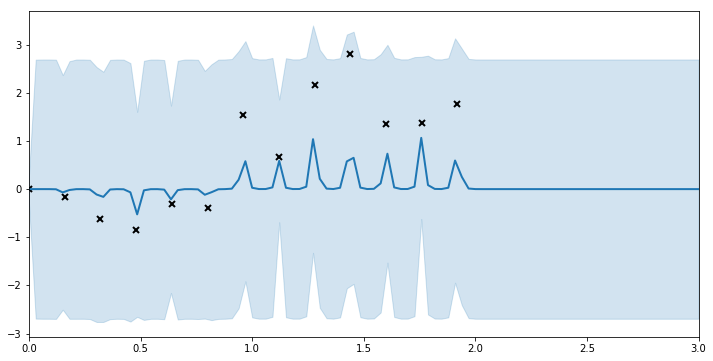

In [63]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [64]:
from statistics import mode
#mode(vector) to use it

In [65]:
# Plotting the marginal likelihood against the parameters
variance_vector=np.linspace(0.01,10,100)
lengthscale_vector=np.linspace(0.1,100,100)

In [66]:
m=[]
for i in range(0,100):
    k=gpflow.kernels.Matern12(1,lengthscales=lengthscale_vector[i],variance=variance_vector[i])
    m.append(gpflow.models.GPR(t_column,x_column,kern=k))
    m[i].likelihood.variance=0

In [67]:
m[2].as_pandas_table()# works now.

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.21181818181818182
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,2.118181818181818
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.0


In [68]:
# This computes the marginal log likelihood before optimization
log_likelihoods=np.array([m.compute_log_likelihood() for m in m])
print(log_likelihoods)


[-895.61521485 -159.17473285 -151.7165009  -149.8710248  -149.11229709
 -148.72375784 -148.49938946 -148.36004255 -148.26946676 -148.2089643
 -148.16802541 -148.14034554 -148.12194514 -148.11020731 -148.10335259
 -148.10013672 -148.09966893 -148.10129859 -148.10454226 -148.10903524
 -148.11449888 -148.12071783 -148.12752399 -148.13478503 -148.14239596
 -148.15027293 -148.15834862 -148.16656871 -148.17488917 -148.18327422
 -148.1916947  -148.20012681 -148.2085511  -148.21695168 -148.22531558
 -148.23363223 -148.24189305 -148.2500911  -148.25822082 -148.26627779
 -148.27425854 -148.28216039 -148.28998133 -148.29771992 -148.30537518
 -148.31294652 -148.32043368 -148.32783668 -148.33515578 -148.3423914
 -148.34954415 -148.35661477 -148.36360408 -148.37051302 -148.37734259
 -148.38409384 -148.39076788 -148.39736584 -148.40388887 -148.41033817
 -148.41671492 -148.42302031 -148.42925554 -148.43542181 -148.4415203
 -148.44755219 -148.45351866 -148.45942085 -148.4652599  -148.47103694
 -148.476

In [69]:
#plt.plot(variance_vector,log_likelihoods)
#plt.xlabel('Variance')
#plt.ylabel('Log Likelihood')

Text(0,0.5,'Log Likelihood')

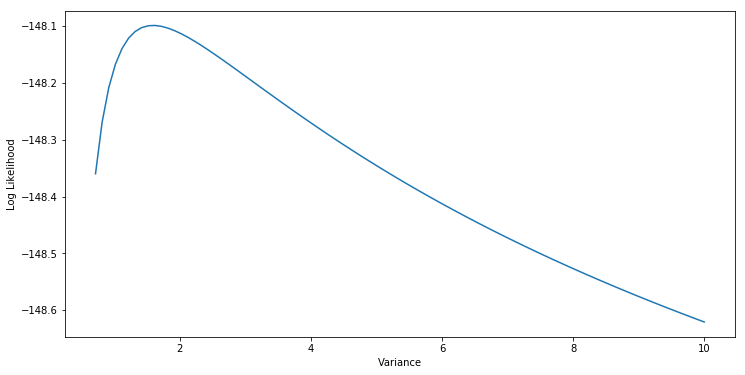

In [70]:
plt.plot(variance_vector[7:],log_likelihoods[7:])
plt.xlabel('Variance')
plt.ylabel('Log Likelihood')

In [71]:
#plt.plot(lengthscale_vector,log_likelihoods)
#plt.xlabel('Lengthscale')
#plt.ylabel('Log Likelihood')

Text(0,0.5,'Log Likelihood')

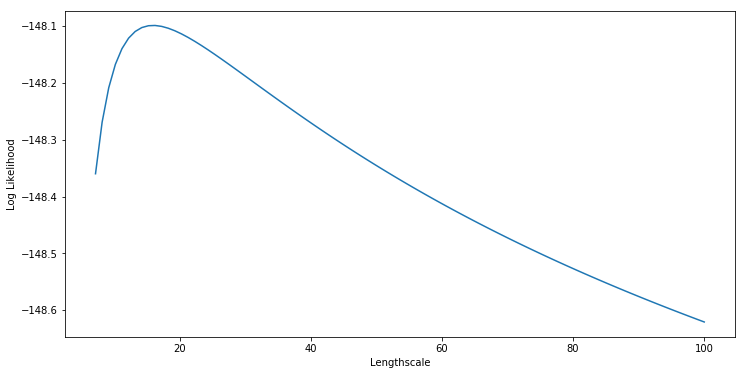

In [72]:
plt.plot(lengthscale_vector[7:],log_likelihoods[7:])
plt.xlabel('Lengthscale')
plt.ylabel('Log Likelihood')

In [73]:
# keeping variance fixed
# Plotting the marginal likelihood against the parameters
variance=1# keeping the variance fixed at 1
lengthscale_vector2=np.linspace(0.1,100,200)# I increased to 200 to better show the mode as it's not quite clear when I have
# 100 as the length of the vector


In [74]:
len(lengthscale_vector2)

200

In [75]:
m2=[]
for i in range(0,200):
    k2=gpflow.kernels.Matern12(1,lengthscales=lengthscale_vector2[i],variance=variance)
    m2.append(gpflow.models.GPR(t_column,x_column,kern=k2))
    m2[i].likelihood.variance=0

In [76]:
# This computes the marginal log likelihood before optimization
log_likelihoods2=np.array([m.compute_log_likelihood() for m in m2])
print(log_likelihoods2)


[  -20.83577833   -18.16110598   -22.42788929   -28.04764494
   -34.27062792   -40.83745033   -47.6268815    -54.57232409
   -61.63322041   -68.78302464   -76.00340807   -83.28118186
   -90.60653805   -97.97198426  -105.37166751  -112.80092821
  -120.25599627  -127.73377812  -135.23170393  -142.74761569
  -150.27968361  -157.82634281  -165.38624448  -172.95821785
  -180.5412402   -188.13441287  -195.73694198  -203.34812277
  -210.9673267   -218.59399087  -226.22760918  -233.86772494
  -241.51392461  -249.16583257  -256.82310661  -264.48543407
  -272.15252852  -279.82412696  -287.49998726  -295.17988607
  -302.86361688  -310.55098842  -318.24182313  -325.93595594
  -333.6332331   -341.33351115  -349.03665608  -356.74254244
  -364.45105269  -372.1620765   -379.87551023  -387.59125634
  -395.30922296  -403.02932343  -410.75147594  -418.47560317
  -426.20163195  -433.92949297  -441.65912056  -449.39045235
  -457.12342914  -464.85799465  -472.59409532  -480.33168016
  -488.07070058  -495.81

Text(0,0.5,'Log Likelihood')

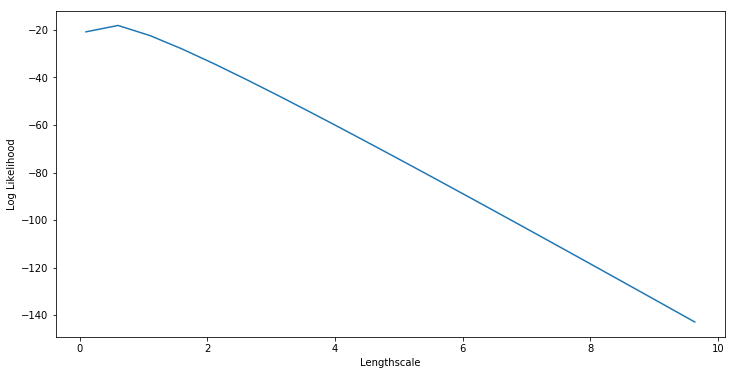

In [77]:
plt.plot(lengthscale_vector2[:-180],log_likelihoods2[:-180])
plt.xlabel('Lengthscale')
plt.ylabel('Log Likelihood')

Text(0,0.5,'Log Likelihood')

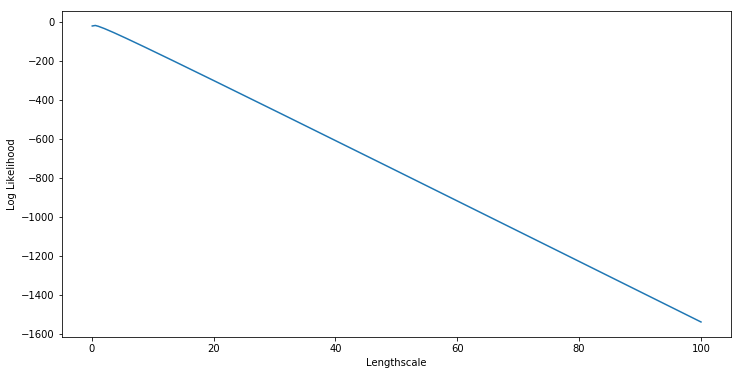

In [78]:
# the whole thing
plt.plot(lengthscale_vector2,log_likelihoods2)
plt.xlabel('Lengthscale')
plt.ylabel('Log Likelihood')

In [79]:
# keeping the lengthscale fixed at 10
variance_vector3=np.linspace(0.01,10,100)
lengthscale=10

In [80]:
m3=[]
for i in range(0,100):
    k3=gpflow.kernels.Matern12(1,lengthscales=10,variance=variance_vector3[i])
    m3.append(gpflow.models.GPR(t_column,x_column,kern=k3))
    m3[i].likelihood.variance=0

In [81]:
m3[55].as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,5.56
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,10.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.0


In [82]:
# This computes the marginal log likelihood before optimization
log_likelihoods3=np.array([m.compute_log_likelihood() for m in m3])
print(log_likelihoods3)


[-15533.20558111  -1391.33814913   -721.97461824   -485.51146202
   -364.91945488   -291.93330472   -243.08770099   -208.1523638
   -181.95653628   -161.60650194   -145.35707953   -132.09357994
   -121.07087281   -111.77208774   -103.82751284    -96.96576123
    -90.98316272    -85.72391229    -81.06681057    -76.91617745
    -73.19548349    -69.84279614    -66.80746523    -64.04767139
    -61.52858643    -59.22097466    -57.1001167     -55.1449722
    -53.33752202    -51.66224636    -50.1057074     -48.65621265
    -47.30354152    -46.03872162    -44.8538446     -43.74191358
    -42.69671604    -41.71271741    -40.78497144    -39.9090444
    -39.08095071    -38.29709798    -37.55423993    -36.84943591
    -36.18001595    -35.5435505     -34.93782409    -34.36081243
    -33.81066232    -33.28567408    -32.78428606    -32.305061
    -31.84667398    -31.40790172    -30.98761309    -30.58476065
    -30.19837309    -29.82754854    -29.47144845    -29.12929225
    -28.80035239    -28.483949

Text(0,0.5,'Log Likelihood')

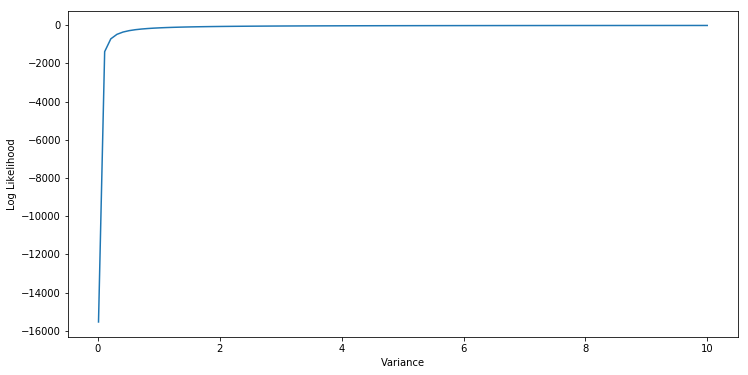

In [83]:
plt.plot(variance_vector3,log_likelihoods3)
plt.xlabel('Variance')
plt.ylabel('Log Likelihood')

Text(0,0.5,'Log Likelihood')

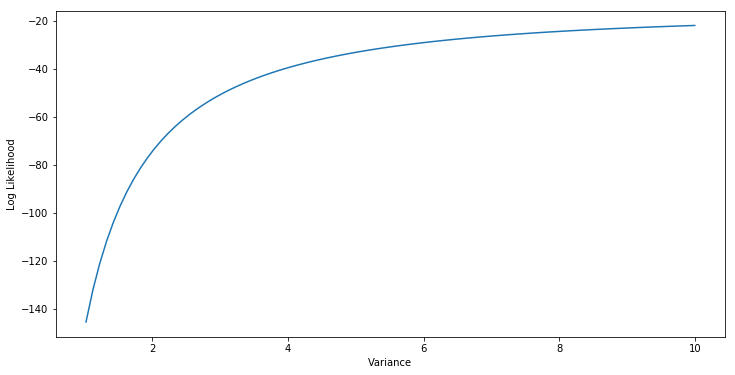

In [84]:
plt.plot(variance_vector3[10:],log_likelihoods3[10:])
plt.xlabel('Variance')
plt.ylabel('Log Likelihood')

Text(0,0.5,'Log Likelihood')

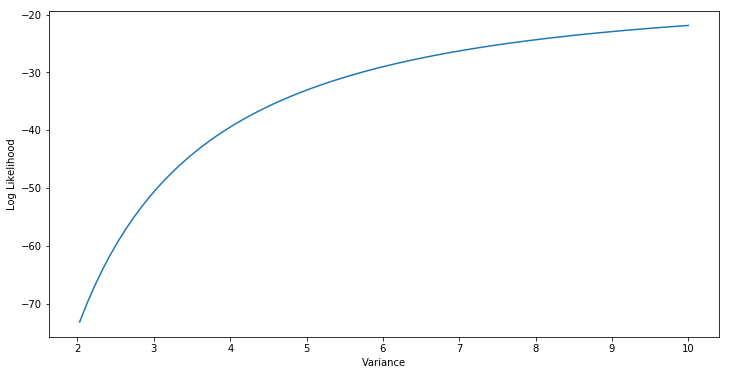

In [85]:
plt.plot(variance_vector3[20:],log_likelihoods3[20:])
plt.xlabel('Variance')
plt.ylabel('Log Likelihood')

Text(0,0.5,'Log Likelihood')

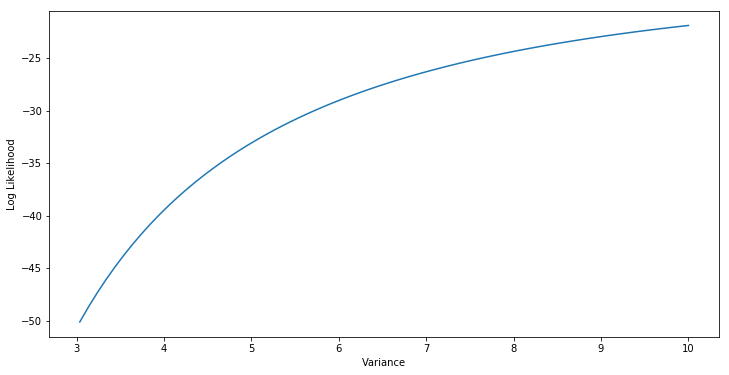

In [86]:
plt.plot(variance_vector3[30:],log_likelihoods3[30:])
plt.xlabel('Variance')
plt.ylabel('Log Likelihood')

In [87]:
# Simulate from a GP and then check the parameters

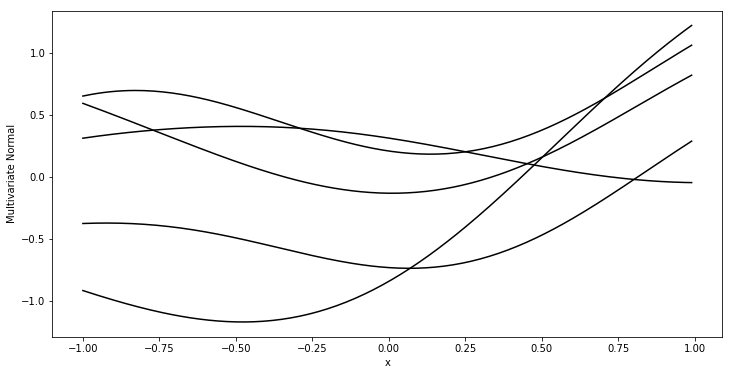

In [88]:
# I try again with different code
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel(x1, x2, variance = 1):
    return exp(-1 * ((x1-x2) ** 2) / (2*variance))

def gram_matrix(xs):
    return [[rbf_kernel(x1,x2) for x2 in xs] for x1 in xs]

xs = np.arange(-1, 1, 0.01)
mean = [0 for x in xs]# lol, this is a column of zeros
gram = gram_matrix(xs)# this a matrix formed by a column of values

plt_vals = []
for i in range(0, 5):
    ys = np.random.multivariate_normal(mean, gram)
    plt_vals.extend([xs, ys, "k"])
plt.plot(*plt_vals)
plt.xlabel('x')
plt.ylabel('Multivariate Normal')
plt.show()

Text(0,0.5,'y')

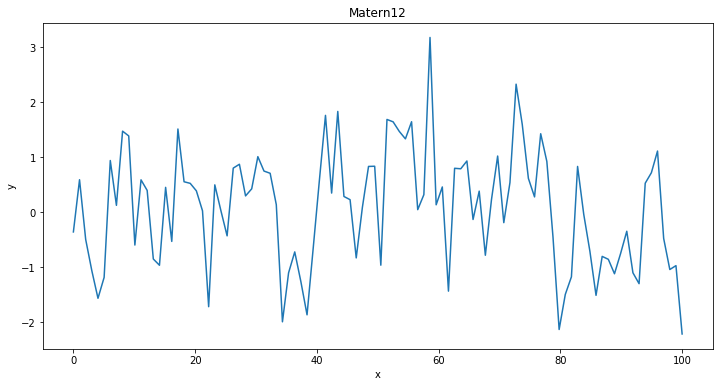

In [89]:
# try again with gpflow and a different kernel
k = gpflow.kernels.Matern12(1,variance=1,lengthscales=1)# kernel
xmin=0
xmax=100
N=100
xx = np.linspace(xmin, xmax, N)[:,None]
K = k.compute_K_symm(xx)# this calculates the covariance matrix
y = np.random.multivariate_normal(np.zeros(N), K, 1).T
plt.plot(xx, y)
plt.title(k.__class__.__name__)
plt.xlabel('x')
plt.ylabel('y')
# So I create the kernel,then I have 100 points, I calculate the covariance matrix K for xx and then I calculate y as a multivariate normal 
# wiith mean 0 and covariance K

In [90]:
m = gpflow.models.GPR(xx,y,kern=k)
m.likelihood.variance = 0.01# observation noise
m.kern.variance=1
m.kern.lengthscales=1
m.as_pandas_table()
# I don't get the parameters back by maximum likelihood

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 138.257665
  Number of iterations: 23
  Number of functions evaluations: 29


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 138.257665
  Number of iterations: 23
  Number of functions evaluations: 29


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.9609116336693886
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,1.464427137755315
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.17343274003654524


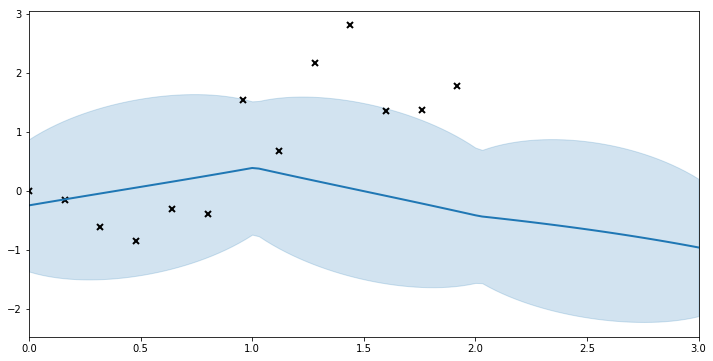

In [91]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [92]:
# This is how you compute the log likelihood
m.compute_log_likelihood()

-138.257664656863

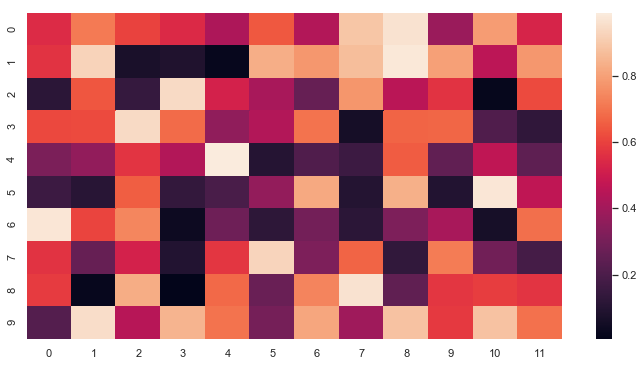

In [93]:
import numpy as np
np.random.seed(0)
import seaborn as sns; 
sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [94]:
# get OU data first
dt=0.02
time=np.arange(0,2,dt)# time
sigma=0.3
a=1# the coefficient in front, the rate
b=1.2# the mean
training_data=ou_levels(a,b,dt,sigma,time)
t=time# time vector
x=training_data
#t=t[::8]
#x=x[::8]
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [95]:
#try different kernels code with OU data
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot


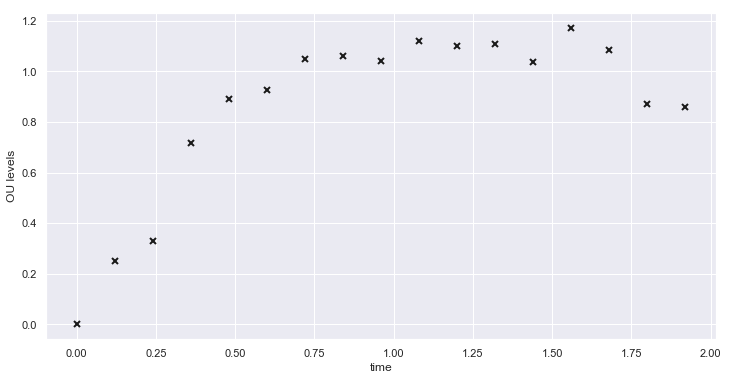

In [96]:
np.random.seed(0)
X = t_column[::6]
Y = x_column[::6]
#Xtest = np.random.rand(10,1)*5
plt.plot(X, Y, 'kx', mew=2)
plt.xlabel('time')
plt.ylabel('OU levels')
plt.show()

In [97]:
m1 = gpflow.models.GPR(X, Y, gpflow.kernels.Matern12(1))
m2 = gpflow.models.GPR(X, Y, gpflow.kernels.Matern32(1))
m3 = gpflow.models.GPR(X, Y,gpflow.kernels.Matern52(1))
m4 =gpflow.models.GPR(X, Y,gpflow.kernels.RBF(1))
m5 = gpflow.models.GPR(X, Y, gpflow.kernels.Constant(1))
m6 = gpflow.models.GPR(X, Y,gpflow.kernels.Linear(1))
m7=gpflow.models.GPR(X, Y,gpflow.kernels.Cosine(1))
m8=gpflow.models.GPR(X, Y,gpflow.kernels.Periodic(1))
models = [m1, m2, m3, m4, m5, m6,m7,m8]
# Everything is set to 1.

In [98]:
m4.as_pandas_table()


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0


In [99]:
names= ['Matern12(1)','Matern32(1)','Matern52(1)','RBF(1)','Constant(1)','Linear(1)','Cosine(1)','Periodic(1)']
# Everything is initialized with 1

In [100]:
#o = gpflow.train.ScipyOptimizer(method='BFGS')
#_ = [o.minimize(m, maxiter=100) for m in models]

In [101]:
len(X)

17

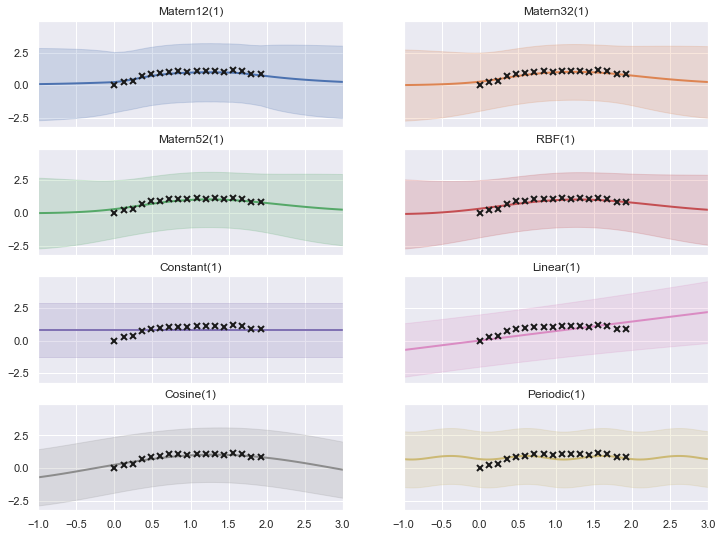

In [102]:
def plot(m, color, ax,names):
    xx = np.linspace(-1, 3, 100)[:,None]
    mu, var = m.predict_y(xx)
    ax.plot(xx, mu, color, lw=2)
    ax.fill_between(xx[:,0], mu[:,0] -  2*np.sqrt(var[:,0]), mu[:,0] +  2*np.sqrt(var[:,0]), color=color, alpha=0.2)
    ax.plot(X, Y, 'kx', mew=2)
    ax.set_xlim(-1, 3)
    ax.set_title(names)
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m1, 'C0',ax[0,0],names[0])# top left is the origin
plot(m2, 'C1', ax[0,1],names[1])# this is the one below
plot(m3, 'C2',ax[1,0],names[2])# this is the first on the right
plot(m4, 'C3',ax[1,1],names[3])
plot(m5, 'C4',ax[2,0],names[4])
plot(m6, 'C6', ax[2,1],names[5])
plot(m7, 'C7',ax[3,0],names[6])
plot(m8, 'C8',ax[3,1],names[7])
# This has 17 points, exactly as above

In [103]:
from IPython import display
#_ = [display.display(m.kern, m.likelihood) for m in models]
[print(m.kern, '\n\n', m.likelihood, '\n\n----\n') for m in models];

                           class prior transform  trainable shape  \
GPR/kern/variance      Parameter  None       +ve       True    ()   
GPR/kern/lengthscales  Parameter  None       +ve       True    ()   

                       fixed_shape value  
GPR/kern/variance             True   1.0  
GPR/kern/lengthscales         True   1.0   

                              class prior transform  trainable shape  \
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape value  
GPR/likelihood/variance         True   1.0   

----

                           class prior transform  trainable shape  \
GPR/kern/variance      Parameter  None       +ve       True    ()   
GPR/kern/lengthscales  Parameter  None       +ve       True    ()   

                       fixed_shape value  
GPR/kern/variance             True   1.0  
GPR/kern/lengthscales         True   1.0   

                              class prior transform  trainable shape  \
GPR/like

In [104]:
print(np.array([m.compute_log_likelihood() for m in models]))


[-19.91820017 -19.02033137 -18.85067334 -18.646525   -18.36221116
 -18.48190048 -18.48259825 -19.29551274]


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -6.982706
  Number of iterations: 40
  Number of functions evaluations: 44


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -6.982706
  Number of iterations: 40
  Number of functions evaluations: 44


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -9.988839
  Number of iterations: 10
  Number of functions evaluations: 14


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -9.988839
  Number of iterations: 10
  Number of functions evaluations: 14


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -10.362710
  Number of iterations: 10
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -10.362710
  Number of iterations: 10
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -10.211600
  Number of iterations: 12
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -10.211600
  Number of iterations: 12
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 8.306515
  Number of iterations: 8
  Number of functions evaluations: 12


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 8.306515
  Number of iterations: 8
  Number of functions evaluations: 12


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 8.958578
  Number of iterations: 8
  Number of functions evaluations: 12


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 8.958578
  Number of iterations: 8
  Number of functions evaluations: 12


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -10.056509
  Number of iterations: 10
  Number of functions evaluations: 20


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -10.056509
  Number of iterations: 10
  Number of functions evaluations: 20


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 8.088183
  Number of iterations: 17
  Number of functions evaluations: 22


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 8.088183
  Number of iterations: 17
  Number of functions evaluations: 22


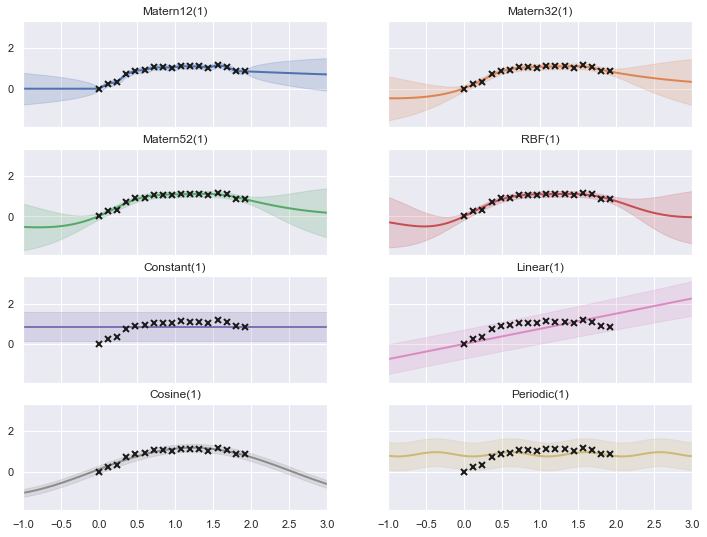

In [105]:
# now plot the optimized plots
o = gpflow.train.ScipyOptimizer(method='BFGS')
opt = [o.minimize(m, maxiter=100) for m in models]
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m1, 'C0',ax[0,0],names[0])# top left is the origin
plot(m2, 'C1', ax[0,1],names[1])# this is the one below
plot(m3, 'C2',ax[1,0],names[2])# this is the first on the right
plot(m4, 'C3',ax[1,1],names[3])
plot(m5, 'C4',ax[2,0],names[4])
plot(m6, 'C6', ax[2,1],names[5])
plot(m7, 'C7',ax[3,0],names[6])
plot(m8, 'C8',ax[3,1],names[7])
# The x's are training data, not test data

(-3, 3)

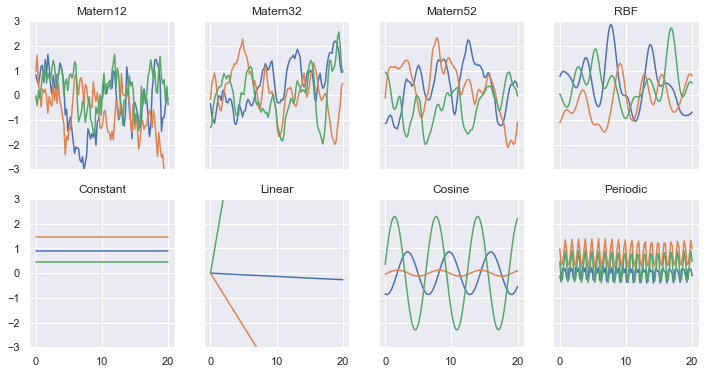

In [106]:
time=np.linspace(0,20,100)# do the same thing as below but for large x-value
def plotkernelsample(k, ax, xmin=-3, xmax=3):
    xx = time.reshape(-1,1)
    K = k.compute_K_symm(xx)
    ax.plot(xx, np.random.multivariate_normal(np.zeros(100), K, 3).T)
    ax.set_title(k.__class__.__name__)

def plotkernelfunction(K, ax, xmin=-3, xmax=3, other=0):
    xx =time.reshape(-1,1)
    K = k.compute_K_symm(xx)
    ax.plot(xx, k.compute_K(xx, np.zeros((1,1)) + other))
    ax.set_title(k.__class__.__name__ + ' k(x, %f)'%other)
f, axes = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
plotkernelsample(gpflow.kernels.Matern12(1), axes[0,0])
plotkernelsample(gpflow.kernels.Matern32(1), axes[0,1])
plotkernelsample(gpflow.kernels.Matern52(1), axes[0,2])
plotkernelsample(gpflow.kernels.RBF(1), axes[0,3])
plotkernelsample(gpflow.kernels.Constant(1), axes[1,0])
plotkernelsample(gpflow.kernels.Linear(1), axes[1,1])
plotkernelsample(gpflow.kernels.Cosine(1), axes[1,2])
plotkernelsample(gpflow.kernels.Periodic(1), axes[1,3])
axes[0,0].set_ylim(-3, 3)

    

Text(0.5,1,'Linear')

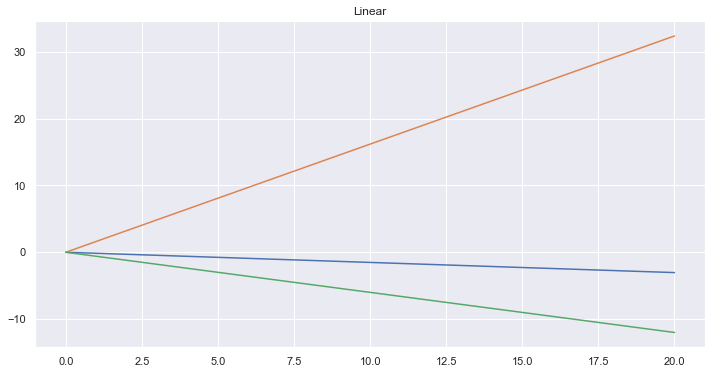

In [107]:
k=gpflow.kernels.Linear(1)
xx =time.reshape(-1,1)# xx is time actually
K = k.compute_K_symm(xx)
y = np.random.multivariate_normal(np.zeros(100), K, 3).T
plt.plot(xx, y)
plt.title(k.__class__.__name__)

In [108]:
# Simulating from a GP prior with different kernels
time=np.linspace(0,2,100)

In [109]:
def plotkernelsample(k, ax, xmin=-3, xmax=3):
    xx = time.reshape(-1,1)
    K = k.compute_K_symm(xx)
    ax.plot(xx, np.random.multivariate_normal(np.zeros(100), K, 3).T)
    ax.set_title(k.__class__.__name__)

def plotkernelfunction(K, ax, xmin=-3, xmax=3, other=0):
    xx =time.reshape(-1,1)
    K = k.compute_K_symm(xx)
    ax.plot(xx, k.compute_K(xx, np.zeros((1,1)) + other))
    ax.set_title(k.__class__.__name__ + ' k(x, %f)'%other)

(-3, 3)

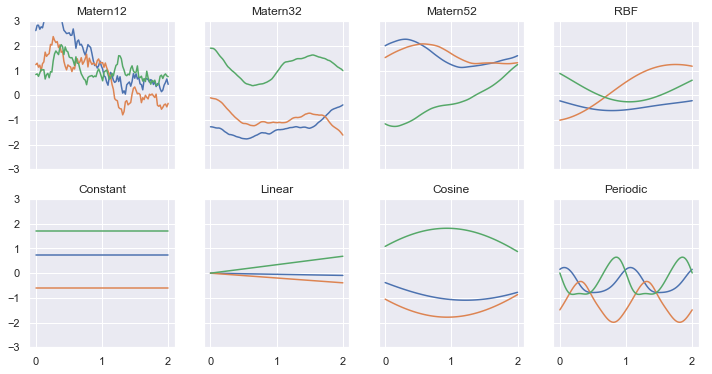

In [110]:
f, axes = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
plotkernelsample(gpflow.kernels.Matern12(1), axes[0,0])
plotkernelsample(gpflow.kernels.Matern32(1), axes[0,1])
plotkernelsample(gpflow.kernels.Matern52(1), axes[0,2])
plotkernelsample(gpflow.kernels.RBF(1), axes[0,3])
plotkernelsample(gpflow.kernels.Constant(1), axes[1,0])
plotkernelsample(gpflow.kernels.Linear(1), axes[1,1])
plotkernelsample(gpflow.kernels.Cosine(1), axes[1,2])
plotkernelsample(gpflow.kernels.Periodic(1), axes[1,3])
axes[0,0].set_ylim(-3, 3)


Text(0.5,1,'Matern12')

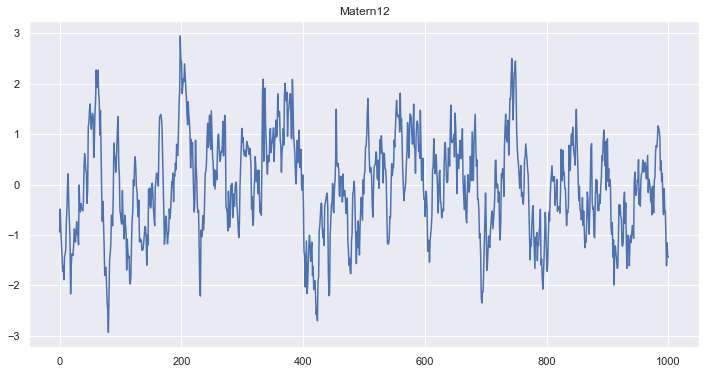

In [111]:
#simulate data from the GP (kernel is matern12)
# true values are variance=1 and lengthscale 10
k = gpflow.kernels.Matern12(1,variance=1,lengthscales=10)
xmin=0
xmax=1000
N=1000
xx = np.linspace(xmin, xmax, N)[:,None]# xx is time actually
K = k.compute_K_symm(xx)
y = np.random.multivariate_normal(np.zeros(N), K, 1).T
plt.plot(xx, y)
plt.title(k.__class__.__name__)

In [112]:
m = gpflow.models.GPR(xx,y,kern=k)
m.kern.lengthscales=10

Text(0,0.5,'OU level')

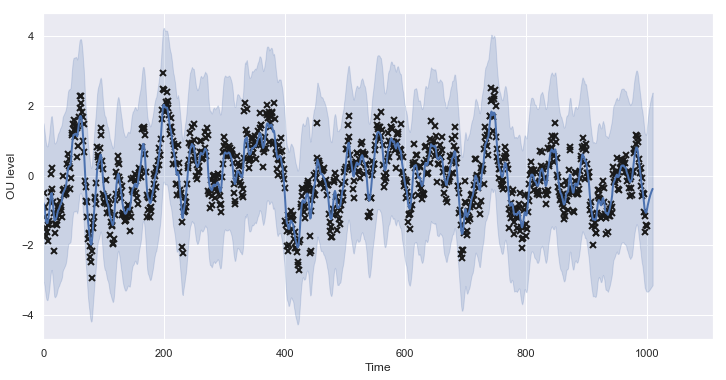

In [113]:
def plot(m):
    tt = np.linspace(0, 1010, 1010).reshape(1010, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(xx,y, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 1110)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 535.507101
  Number of iterations: 36
  Number of functions evaluations: 125


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 535.507101
  Number of iterations: 36
  Number of functions evaluations: 125


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.9586227166957804
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,10.21769998099965
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0000683215706208e-06


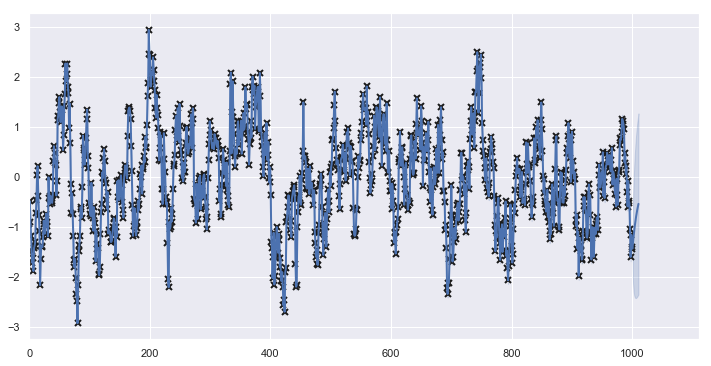

In [114]:
o = gpflow.train.ScipyOptimizer(method='BFGS')
opt_matern12=o.minimize(m)
plot(m)
m.as_pandas_table()

In [115]:
m.compute_log_likelihood() 

-535.5071005840605

Text(0.5,1,'Matern12')

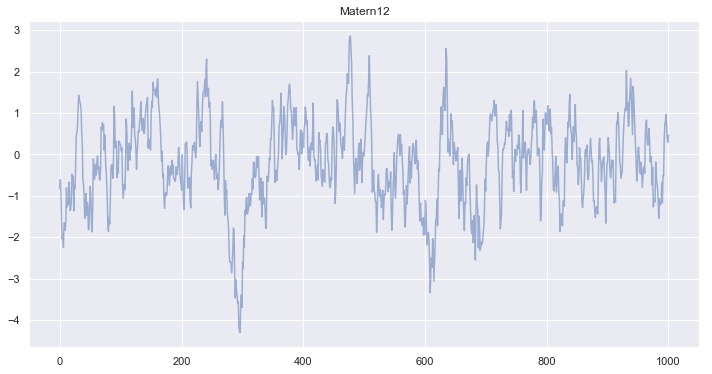

In [116]:
# try different kernels, start again from here
# true values are variance 1 and lengthscale 10
#simulate data from the GP prior (kernel is matern12)
k = gpflow.kernels.Matern12(1,variance=1,lengthscales=10)# prior parameters actually I think
xmin=0
xmax=1000
N=1000
xx = np.linspace(xmin, xmax, N)[:,None]# xx is time actually
K = k.compute_K_symm(xx)
y = np.random.multivariate_normal(np.zeros(N), K, 1).T
plt.plot(xx,y,alpha=0.5)
plt.title(k.__class__.__name__)

In [117]:
m = gpflow.models.GPR(xx,y,kern=k)
m.kern.lengthscales=10 # beware how you spell it
m.kern.variance=1
m.compute_log_likelihood() 
# initial model parameters

-1214.2016380332952

In [118]:
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,10.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0


In [119]:
# m is Matern12, I simulated from this kernel
m1 = gpflow.models.GPR(xx,y,gpflow.kernels.Matern32(1,lengthscales=10))
m2 = gpflow.models.GPR(xx,y,gpflow.kernels.Matern52(1,lengthscales=10))
m3 =gpflow.models.GPR(xx,y,gpflow.kernels.RBF(1,lengthscales=10))
m4 = gpflow.models.GPR(xx,y, gpflow.kernels.Constant(10))
m5 = gpflow.models.GPR(xx,y,gpflow.kernels.Linear(1))
m6=gpflow.models.GPR(xx,y,gpflow.kernels.Cosine(1,lengthscales=10))
m7=gpflow.models.GPR(xx,y,gpflow.kernels.Periodic(1,lengthscales=10))
models = [m,m1, m2, m3, m4, m5, m6,m7]
#initial parameters are 1 and 10 in this first case

In [120]:
m1.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,10.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0


In [121]:
names_initial= ['Matern12(10)','Matern32(10)','Matern52(10)','RBF(10)','Constant(10)','Linear(1)','Cosine(10)','Periodic(10)']

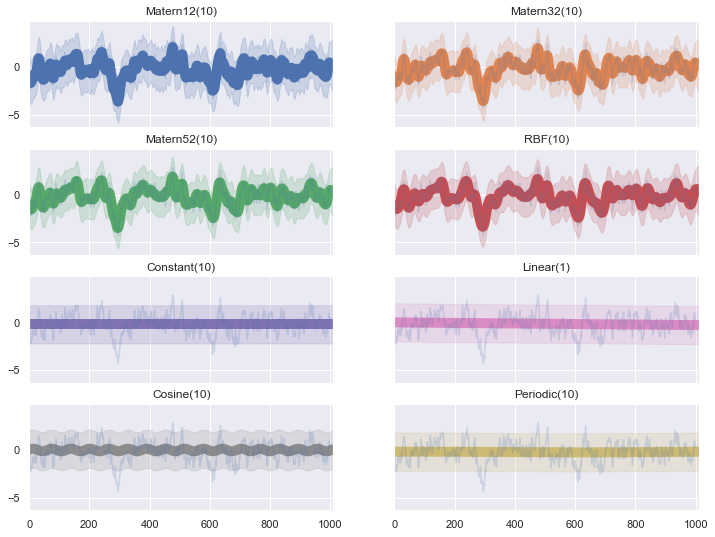

In [122]:
# prediction plot or initial plots
def plot(m, color, ax,names):
    xxt = np.linspace(0, 1010, 1010)[:,None]
    mu, var = m.predict_y(xxt)
    ax.plot(xxt, mu, color, lw=10)
    ax.fill_between(xxt[:,0], mu[:,0] -  2*np.sqrt(var[:,0]), mu[:,0] +  2*np.sqrt(var[:,0]), color=color, alpha=0.2)
    ax.plot(xx,y,mew=2,alpha=0.2)
    ax.set_xlim(0, 1010)
    ax.set_title(names)
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m, 'C0',ax[0,0],names_initial[0])# top left is the origin
plot(m1, 'C1', ax[0,1],names_initial[1])# this is the one below
plot(m2, 'C2',ax[1,0],names_initial[2])# this is the first on the right
plot(m3, 'C3',ax[1,1],names_initial[3])
plot(m4, 'C4',ax[2,0],names_initial[4])
plot(m5, 'C6', ax[2,1],names_initial[5])
plot(m6, 'C7',ax[3,0],names_initial[6])
plot(m7, 'C8',ax[3,1],names_initial[7])

In [123]:
print(np.array([m.compute_log_likelihood() for m in models]))# log-likelihood for the initial models


[-1214.20163803 -1174.76653618 -1171.34476558 -1173.79530734
 -1476.71979939 -1491.93942087 -1497.37870831 -1476.84372504]


In [124]:
names_optimized=['Matern12','Matern32','Matern52','RBF','Constant','Linear','Cosine','Periodic']

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 572.404164
  Number of iterations: 34
  Number of functions evaluations: 38


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 572.404164
  Number of iterations: 34
  Number of functions evaluations: 38


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 590.479258
  Number of iterations: 17
  Number of functions evaluations: 27


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 590.479258
  Number of iterations: 17
  Number of functions evaluations: 27


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 605.984807
  Number of iterations: 15
  Number of functions evaluations: 84


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 605.984807
  Number of iterations: 15
  Number of functions evaluations: 84


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 643.202749
  Number of iterations: 13
  Number of functions evaluations: 120


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 643.202749
  Number of iterations: 13
  Number of functions evaluations: 120


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.841847
  Number of iterations: 9
  Number of functions evaluations: 13


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.841847
  Number of iterations: 9
  Number of functions evaluations: 13


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1481.328799
  Number of iterations: 21
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1481.328799
  Number of iterations: 21
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1487.327508
  Number of iterations: 12
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1487.327508
  Number of iterations: 12
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 1469.947164
  Number of iterations: 23
  Number of functions evaluations: 93


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 1469.947164
  Number of iterations: 23
  Number of functions evaluations: 93


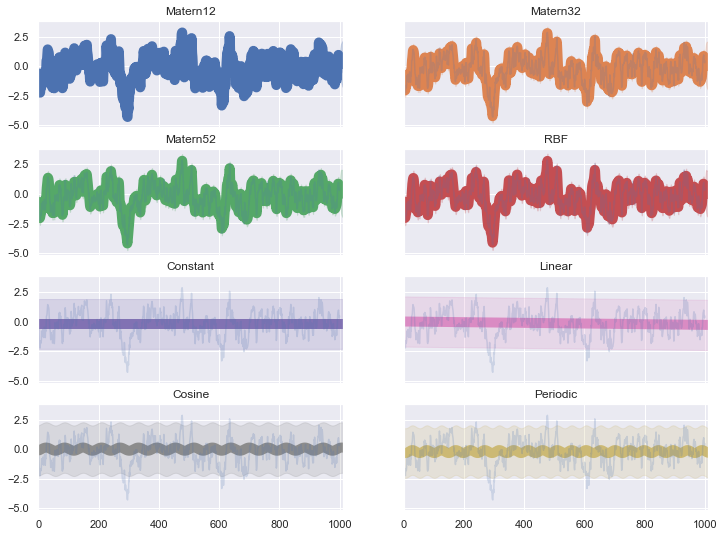

In [125]:
o = gpflow.train.ScipyOptimizer(method='BFGS')
opt = [o.minimize(m) for m in models]
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m, 'C0',ax[0,0],names_optimized[0])# top left is the origin
plot(m1, 'C1', ax[0,1],names_optimized[1])# this is the one below
plot(m2, 'C2',ax[1,0],names_optimized[2])# this is the first on the right
plot(m3, 'C3',ax[1,1],names_optimized[3])
plot(m4, 'C4',ax[2,0],names_optimized[4])
plot(m5, 'C6', ax[2,1],names_optimized[5])
plot(m6, 'C7',ax[3,0],names_optimized[6])
plot(m7, 'C8',ax[3,1],names_optimized[7])

In [126]:
print(np.array([m.compute_log_likelihood() for m in models]))# log-likelihood for the optimzed models
# finally it stands out

[ -572.40416351  -590.47925753  -605.98480657  -643.20274889
 -1472.8418467  -1481.32879935 -1487.32750753 -1469.94716377]


In [127]:
#Optimized values, read them carefully
print(m.as_pandas_table())
print(m1.as_pandas_table())
print(m2.as_pandas_table())
print(m3.as_pandas_table())
print(m4.as_pandas_table())
print(m5.as_pandas_table())
print(m6.as_pandas_table())
print(m7.as_pandas_table())

                             class prior transform  trainable shape  \
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape                  value  
GPR/kern/variance               True      1.146197544196643  
GPR/kern/lengthscales           True     11.467115764736691  
GPR/likelihood/variance         True  1.000052755355638e-06  
                             class prior transform  trainable shape  \
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape                 value  
GPR/kern/variance               True    0.9850555713428113  
GPR/kern/lengthscales           True     4.462912319059288  

In [128]:
#different initialisations
m = gpflow.models.GPR(xx,y,kern=k)
m.kern.lengthscales=5
m.kern.variance=1

In [129]:
m1 = gpflow.models.GPR(xx,y,gpflow.kernels.Matern32(1,lengthscales=5))
m2 = gpflow.models.GPR(xx,y,gpflow.kernels.Matern52(1,lengthscales=5))
m3 =gpflow.models.GPR(xx,y,gpflow.kernels.RBF(1,lengthscales=5))
m4 = gpflow.models.GPR(xx,y, gpflow.kernels.Constant(5))
m5 = gpflow.models.GPR(xx,y,gpflow.kernels.Linear(1))
m6=gpflow.models.GPR(xx,y,gpflow.kernels.Cosine(1,lengthscales=5))
m7=gpflow.models.GPR(xx,y,gpflow.kernels.Periodic(1,lengthscales=5))
models = [m,m1, m2, m3, m4, m5, m6,m7]


In [130]:
names_initial= ['Matern12(1,5)','Matern32(1,5)','Matern52(1,5)','RBF(1,5)','Constant(5)','Linear(1)','Cosine(1,5)','Periodic(1,5)']

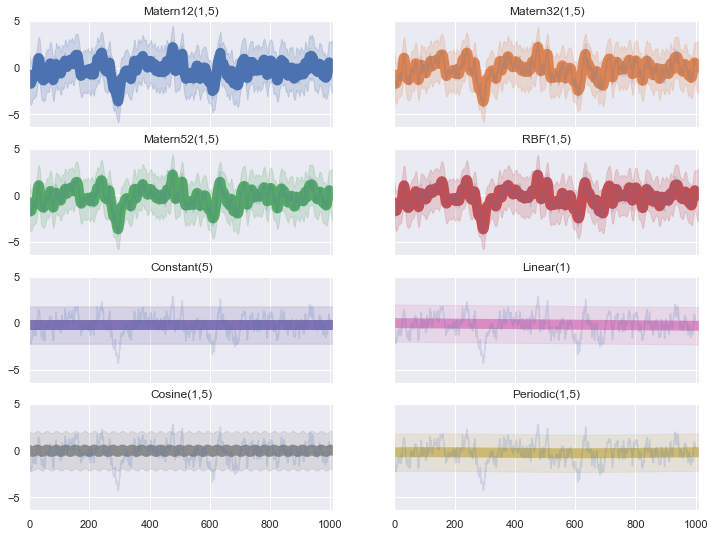

In [131]:
# 
def plot(m, color, ax,names):
    xxt = np.linspace(0, 1010, 1010)[:,None]
    mu, var = m.predict_y(xxt)
    ax.plot(xxt, mu, color, lw=10)
    ax.fill_between(xxt[:,0], mu[:,0] -  2*np.sqrt(var[:,0]), mu[:,0] +  2*np.sqrt(var[:,0]), color=color, alpha=0.2)
    ax.plot(xx,y,mew=2,alpha=0.2)
    ax.set_xlim(0, 1010)
    ax.set_title(names)
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m, 'C0',ax[0,0],names_initial[0])# top left is the origin
plot(m1, 'C1', ax[0,1],names_initial[1])# this is the one below
plot(m2, 'C2',ax[1,0],names_initial[2])# this is the first on the right
plot(m3, 'C3',ax[1,1],names_initial[3])
plot(m4, 'C4',ax[2,0],names_initial[4])
plot(m5, 'C6', ax[2,1],names_initial[5])
plot(m6, 'C7',ax[3,0],names_initial[6])
plot(m7, 'C8',ax[3,1],names_initial[7])

In [132]:
print(np.array([m.compute_log_likelihood() for m in models]))# log-likelihood for the initial models


[-1258.78104817 -1206.93765547 -1196.76384167 -1184.83355019
 -1476.71979939 -1491.93942087 -1497.98135065 -1477.43947253]


In [133]:
names_optimized=['Matern12','Matern32','Matern52','RBF','Constant','Linear','Cosine','Periodic']

INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 572.404163
  Number of iterations: 41
  Number of functions evaluations: 120


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 572.404163
  Number of iterations: 41
  Number of functions evaluations: 120


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 590.479258
  Number of iterations: 10
  Number of functions evaluations: 160


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 590.479258
  Number of iterations: 10
  Number of functions evaluations: 160


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 605.984807
  Number of iterations: 9
  Number of functions evaluations: 92


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 605.984807
  Number of iterations: 9
  Number of functions evaluations: 92


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 643.202749
  Number of iterations: 10
  Number of functions evaluations: 114


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 643.202749
  Number of iterations: 10
  Number of functions evaluations: 114


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.841847
  Number of iterations: 9
  Number of functions evaluations: 13


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.841847
  Number of iterations: 9
  Number of functions evaluations: 13


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1481.328799
  Number of iterations: 21
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1481.328799
  Number of iterations: 21
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 1483.059439
  Number of iterations: 13
  Number of functions evaluations: 82


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 1483.059439
  Number of iterations: 13
  Number of functions evaluations: 82


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.327227
  Number of iterations: 22
  Number of functions evaluations: 30


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.327227
  Number of iterations: 22
  Number of functions evaluations: 30


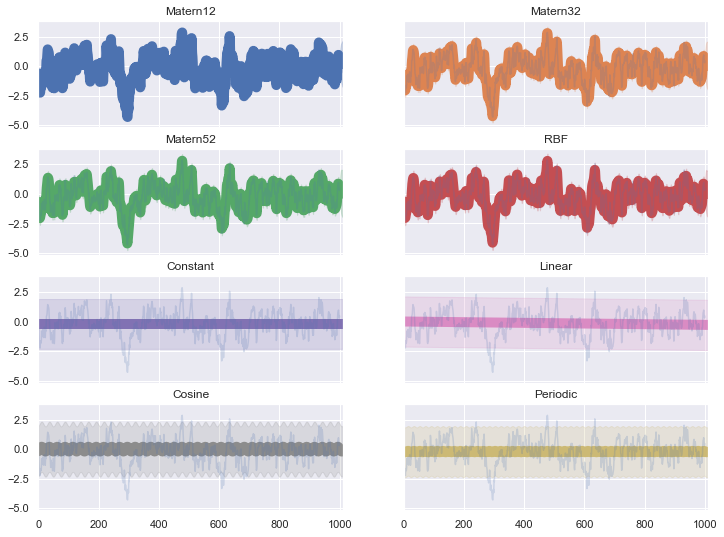

In [134]:
o = gpflow.train.ScipyOptimizer(method='BFGS')
opt = [o.minimize(m) for m in models]
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m, 'C0',ax[0,0],names_optimized[0])# top left is the origin
plot(m1, 'C1', ax[0,1],names_optimized[1])# this is the one below
plot(m2, 'C2',ax[1,0],names_optimized[2])# this is the first on the right
plot(m3, 'C3',ax[1,1],names_optimized[3])
plot(m4, 'C4',ax[2,0],names_optimized[4])
plot(m5, 'C6', ax[2,1],names_optimized[5])
plot(m6, 'C7',ax[3,0],names_optimized[6])
plot(m7, 'C8',ax[3,1],names_optimized[7])

In [135]:
print(np.array([m.compute_log_likelihood() for m in models]))# log-likelihood for the optimzed models


[ -572.40416349  -590.47925753  -605.98480657  -643.20274889
 -1472.8418467  -1481.32879935 -1483.05943886 -1472.32722666]


In [136]:
#Optimized values, read them carefully
print(m.as_pandas_table())
print(m1.as_pandas_table())
print(m2.as_pandas_table())
print(m3.as_pandas_table())
print(m4.as_pandas_table())
print(m5.as_pandas_table())
print(m6.as_pandas_table())
print(m7.as_pandas_table())

                             class prior transform  trainable shape  \
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape                   value  
GPR/kern/variance               True      1.1461964501368502  
GPR/kern/lengthscales           True      11.467106511665028  
GPR/likelihood/variance         True  1.0000062985172633e-06  
                             class prior transform  trainable shape  \
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape                value  
GPR/kern/variance               True   0.9850551929012049  
GPR/kern/lengthscales           True    4.462912604115659 

In [137]:
#different initialisation
m = gpflow.models.GPR(xx,y,kern=k)
m.kern.lengthscales=1
m.kern.variance=0.1
m.compute_log_likelihood() 

-1446.6445805718402

In [138]:
m1 = gpflow.models.GPR(xx,y,gpflow.kernels.Matern32(1,lengthscales=1))
m2 = gpflow.models.GPR(xx,y,gpflow.kernels.Matern52(1,lengthscales=1))
m3 =gpflow.models.GPR(xx,y,gpflow.kernels.RBF(1,lengthscales=1))
m4 = gpflow.models.GPR(xx,y, gpflow.kernels.Constant(1))
m5 = gpflow.models.GPR(xx,y,gpflow.kernels.Linear(1))
m6=gpflow.models.GPR(xx,y,gpflow.kernels.Cosine(1,lengthscales=1))
m7=gpflow.models.GPR(xx,y,gpflow.kernels.Periodic(1,lengthscales=1))
models = [m,m1, m2, m3, m4, m5, m6,m7]

In [139]:
names_initial= ['Matern12(0.1,1)','Matern32(1,1)','Matern52(1,1)','RBF(1,1)','Constant(1)','Linear(1)','Cosine(1,1)','Periodic(1,1)']

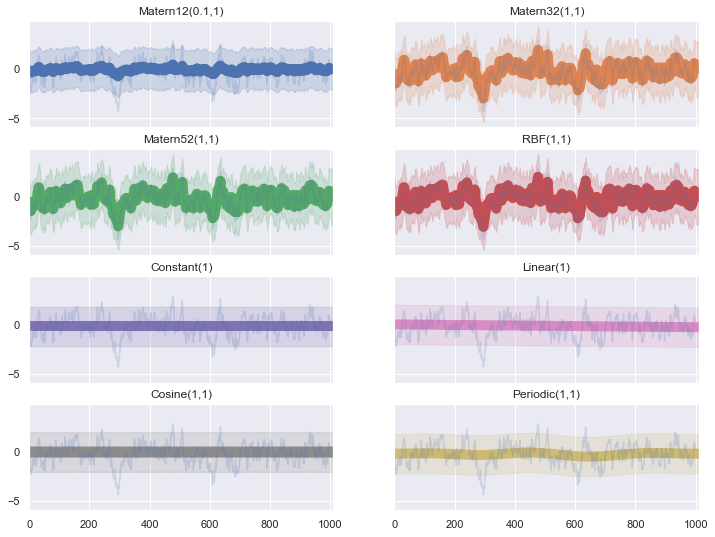

In [140]:
# 
def plot(m, color, ax,names):
    xxt = np.linspace(0, 1010, 1010)[:,None]
    mu, var = m.predict_y(xxt)
    ax.plot(xxt, mu, color, lw=10)
    ax.fill_between(xxt[:,0], mu[:,0] -  2*np.sqrt(var[:,0]), mu[:,0] +  2*np.sqrt(var[:,0]), color=color, alpha=0.2)
    ax.plot(xx,y,mew=2,alpha=0.2)
    ax.set_xlim(0, 1010)
    ax.set_title(names)
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m, 'C0',ax[0,0],names_initial[0])# top left is the origin
plot(m1, 'C1', ax[0,1],names_initial[1])# this is the one below
plot(m2, 'C2',ax[1,0],names_initial[2])# this is the first on the right
plot(m3, 'C3',ax[1,1],names_initial[3])
plot(m4, 'C4',ax[2,0],names_initial[4])
plot(m5, 'C6', ax[2,1],names_initial[5])
plot(m6, 'C7',ax[3,0],names_initial[6])
plot(m7, 'C8',ax[3,1],names_initial[7])

In [141]:
print(np.array([m.compute_log_likelihood() for m in models]))# log-likelihood for the initial models


[-1446.64458057 -1421.49601471 -1413.27416112 -1395.07426308
 -1476.71979939 -1491.93942087 -1501.37467834 -1467.12631935]


In [142]:
names_optimized=['Matern12','Matern32','Matern52','RBF','Constant','Linear','Cosine','Periodic']

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 572.404163
  Number of iterations: 43
  Number of functions evaluations: 47


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 572.404163
  Number of iterations: 43
  Number of functions evaluations: 47


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 590.479258
  Number of iterations: 13
  Number of functions evaluations: 80


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 590.479258
  Number of iterations: 13
  Number of functions evaluations: 80


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 605.984807
  Number of iterations: 11
  Number of functions evaluations: 56


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 605.984807
  Number of iterations: 11
  Number of functions evaluations: 56


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 643.202749
  Number of iterations: 11
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 643.202749
  Number of iterations: 11
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.841847
  Number of iterations: 9
  Number of functions evaluations: 13


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.841847
  Number of iterations: 9
  Number of functions evaluations: 13


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1481.328799
  Number of iterations: 21
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1481.328799
  Number of iterations: 21
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1490.338601
  Number of iterations: 38
  Number of functions evaluations: 45


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1490.338601
  Number of iterations: 38
  Number of functions evaluations: 45


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 1457.367877
  Number of iterations: 16
  Number of functions evaluations: 177


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 1457.367877
  Number of iterations: 16
  Number of functions evaluations: 177


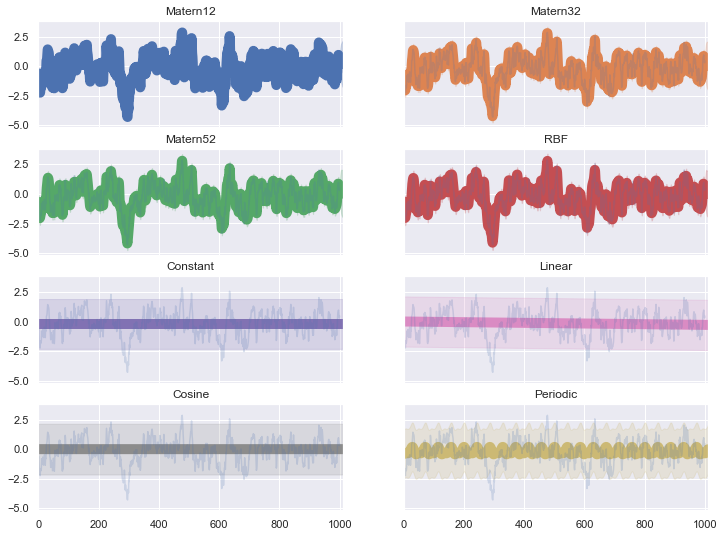

In [143]:
o = gpflow.train.ScipyOptimizer(method='BFGS')
opt = [o.minimize(m) for m in models]
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m, 'C0',ax[0,0],names_optimized[0])# top left is the origin
plot(m1, 'C1', ax[0,1],names_optimized[1])# this is the one below
plot(m2, 'C2',ax[1,0],names_optimized[2])# this is the first on the right
plot(m3, 'C3',ax[1,1],names_optimized[3])
plot(m4, 'C4',ax[2,0],names_optimized[4])
plot(m5, 'C6', ax[2,1],names_optimized[5])
plot(m6, 'C7',ax[3,0],names_optimized[6])
plot(m7, 'C8',ax[3,1],names_optimized[7])

In [144]:
print(np.array([m.compute_log_likelihood() for m in models]))# log-likelihood for the optimzed models


[ -572.40416349  -590.47925753  -605.98480657  -643.20274889
 -1472.8418467  -1481.32879935 -1490.33860053 -1457.3678769 ]


In [145]:
#Optimized values, read them carefully
print(m.as_pandas_table())
print(m1.as_pandas_table())
print(m2.as_pandas_table())
print(m3.as_pandas_table())
print(m4.as_pandas_table())
print(m5.as_pandas_table())
print(m6.as_pandas_table())
print(m7.as_pandas_table())

                             class prior transform  trainable shape  \
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape                   value  
GPR/kern/variance               True      1.1461977597518485  
GPR/kern/lengthscales           True      11.467118157786116  
GPR/likelihood/variance         True  1.0000124047438987e-06  
                             class prior transform  trainable shape  \
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape               value  
GPR/kern/variance               True  0.9850563781350303  
GPR/kern/lengthscales           True   4.462920945642279  
G

In [146]:
#different initialisation
m = gpflow.models.GPR(xx,y,kern=k)
m.kern.lengthscales=20
m.kern.variance=1
m.compute_log_likelihood() 


-1193.2146443112695

In [147]:
m1 = gpflow.models.GPR(xx,y,gpflow.kernels.Matern32(1,lengthscales=20))
m2 = gpflow.models.GPR(xx,y,gpflow.kernels.Matern52(1,lengthscales=20))
m3 =gpflow.models.GPR(xx,y,gpflow.kernels.RBF(1,lengthscales=20))
m4 = gpflow.models.GPR(xx,y, gpflow.kernels.Constant(20))
m5 = gpflow.models.GPR(xx,y,gpflow.kernels.Linear(1))
m6=gpflow.models.GPR(xx,y,gpflow.kernels.Cosine(1,lengthscales=20))
m7=gpflow.models.GPR(xx,y,gpflow.kernels.Periodic(1,lengthscales=20))
models = [m,m1, m2, m3, m4, m5, m6,m7]


In [148]:
names_initial= ['Matern12(1,20)','Matern32(1,20)','Matern52(1,20)','RBF(1,20)','Constant(20)','Linear(1)','Cosine(1,20)','Periodic(1,20)']

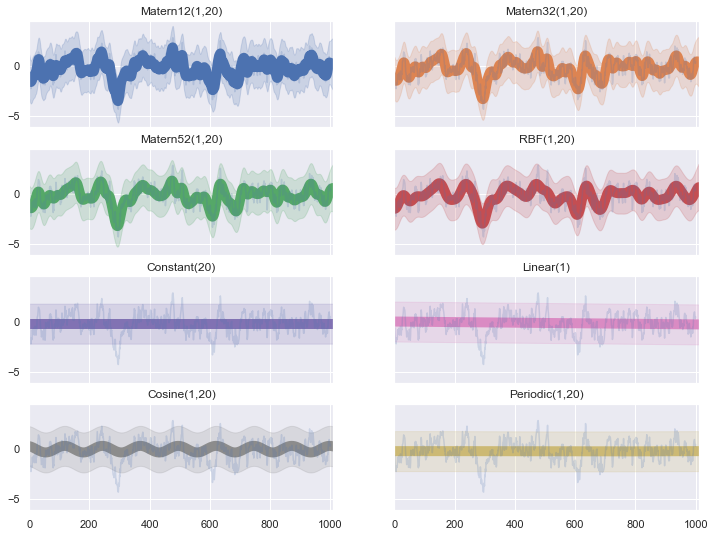

In [149]:
#
def plot(m, color, ax,names):
    xxt = np.linspace(0, 1010, 1010)[:,None]
    mu, var = m.predict_y(xxt)
    ax.plot(xxt, mu, color, lw=10)
    ax.fill_between(xxt[:,0], mu[:,0] -  2*np.sqrt(var[:,0]), mu[:,0] +  2*np.sqrt(var[:,0]), color=color, alpha=0.2)
    ax.plot(xx,y,mew=2,alpha=0.2)
    ax.set_xlim(0, 1010)
    ax.set_title(names)
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m, 'C0',ax[0,0],names_initial[0])# top left is the origin
plot(m1, 'C1', ax[0,1],names_initial[1])# this is the one below
plot(m2, 'C2',ax[1,0],names_initial[2])# this is the first on the right
plot(m3, 'C3',ax[1,1],names_initial[3])
plot(m4, 'C4',ax[2,0],names_initial[4])
plot(m5, 'C6', ax[2,1],names_initial[5])
plot(m6, 'C7',ax[3,0],names_initial[6])
plot(m7, 'C8',ax[3,1],names_initial[7])

In [150]:
print(np.array([m.compute_log_likelihood() for m in models]))# log-likelihood for the initial models


[-1193.21464431 -1181.1098641  -1189.84121592 -1219.5077072
 -1476.71979939 -1491.93942087 -1474.94474846 -1476.69857741]


In [151]:
names_optimized=['Matern12','Matern32','Matern52','RBF','Constant','Linear','Cosine','Periodic']

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 572.404164
  Number of iterations: 37
  Number of functions evaluations: 41


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 572.404164
  Number of iterations: 37
  Number of functions evaluations: 41


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 590.479258
  Number of iterations: 17
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 590.479258
  Number of iterations: 17
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 605.984807
  Number of iterations: 16
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 605.984807
  Number of iterations: 16
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 643.202749
  Number of iterations: 19
  Number of functions evaluations: 35


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 643.202749
  Number of iterations: 19
  Number of functions evaluations: 35


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.841847
  Number of iterations: 9
  Number of functions evaluations: 13


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1472.841847
  Number of iterations: 9
  Number of functions evaluations: 13


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1481.328799
  Number of iterations: 21
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1481.328799
  Number of iterations: 21
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1456.289861
  Number of iterations: 11
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1456.289861
  Number of iterations: 11
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 1472.039959
  Number of iterations: 48
  Number of functions evaluations: 150


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: 1472.039959
  Number of iterations: 48
  Number of functions evaluations: 150


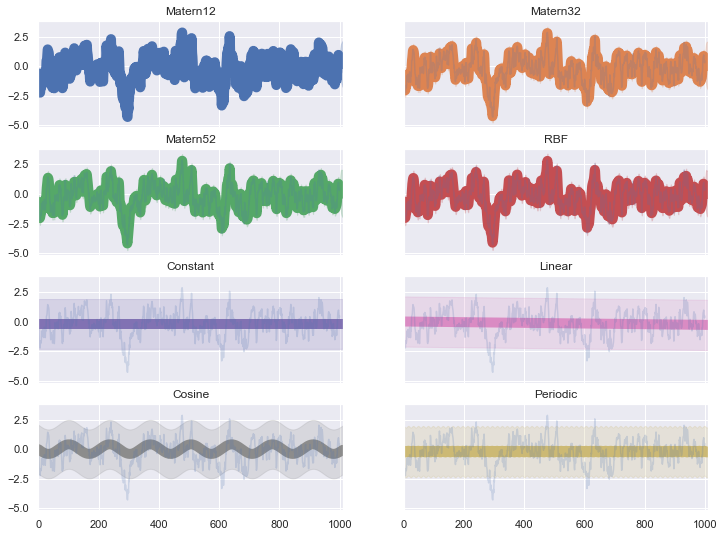

In [152]:
o = gpflow.train.ScipyOptimizer(method='BFGS')
opt = [o.minimize(m) for m in models]
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m, 'C0',ax[0,0],names_optimized[0])# top left is the origin
plot(m1, 'C1', ax[0,1],names_optimized[1])# this is the one below
plot(m2, 'C2',ax[1,0],names_optimized[2])# this is the first on the right
plot(m3, 'C3',ax[1,1],names_optimized[3])
plot(m4, 'C4',ax[2,0],names_optimized[4])
plot(m5, 'C6', ax[2,1],names_optimized[5])
plot(m6, 'C7',ax[3,0],names_optimized[6])
plot(m7, 'C8',ax[3,1],names_optimized[7])

In [153]:
print(np.array([m.compute_log_likelihood() for m in models]))# log-likelihood for the optimzed models


[ -572.40416375  -590.47925753  -605.98480658  -643.20274889
 -1472.8418467  -1481.32879935 -1456.28986141 -1472.03995852]


In [154]:
#Optimized values, read them carefully
print(m.as_pandas_table())
print(m1.as_pandas_table())
print(m2.as_pandas_table())
print(m3.as_pandas_table())
print(m4.as_pandas_table())
print(m5.as_pandas_table())
print(m6.as_pandas_table())
print(m7.as_pandas_table())

                             class prior transform  trainable shape  \
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape                  value  
GPR/kern/variance               True      1.146197314727663  
GPR/kern/lengthscales           True     11.467113731536358  
GPR/likelihood/variance         True  1.000657865539605e-06  
                             class prior transform  trainable shape  \
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape                value  
GPR/kern/variance               True   0.9850555287825585  
GPR/kern/lengthscales           True     4.46291232909476  
GP